In [2]:
import pymc3 as pm 

In [1]:
# treatment and control 
n = 1000

obs_v1 = 680 # control 
obs_v2 = 720 # treatment 

In [3]:
# prior Beta
# likelihood Bernoulli -> pm.Binomial 

with pm.Model() as ab_model:
    
    ### PRIORS 
    prior_v1 = pm.Beta("v1_beta", alpha=2, beta=2)
    prior_v2 = pm.Beta("v2_beta", alpha=2, beta=2)
    
    ### LIKELIHOOD
    lik_v1 = pm.Binomial("v1_lik", n=n, p=prior_v1, observed=obs_v1)
    lik_v2 = pm.Binomial("v2_lik", n=n, p=prior_v2, observed=obs_v2)
    
    ### DETERMINISTIC FUNCTIONS 
    delta = pm.Deterministic("delta", prior_v1 - prior_v2)

In [4]:
with ab_model:
    #trace = pm.sample(10000, target_accept=0.6) # kind of "learning rate"
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [v2_beta, v1_beta]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:10<00:00, 3971.44draws/s]


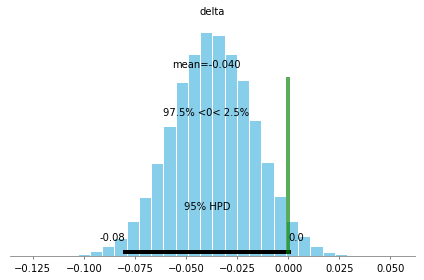

In [5]:
pm.plot_posterior(trace[1000:], varnames=["delta"], ref_val=0)